In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,
                              GradientBoostingClassifier,RandomForestClassifier,VotingClassifier)
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [3]:
data_set = pd.read_csv('E:\\MachineLearning_Competitons\\Titanic\\train.csv')
test_set = pd.read_csv('E:\\MachineLearning_Competitons\\Titanic\\test.csv')

In [4]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5,1,'Distribution of survived and dead people.')

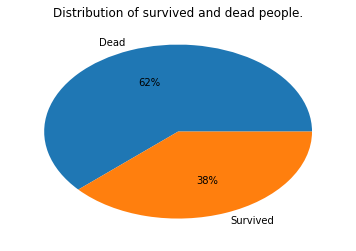

In [7]:
plt.pie(data_set['Survived'].value_counts(),labels=['Dead','Survived'],autopct='%.0f%%')
plt.title('Distribution of survived and dead people.')

Text(0.5,1,'Distribution of survivors classes.')

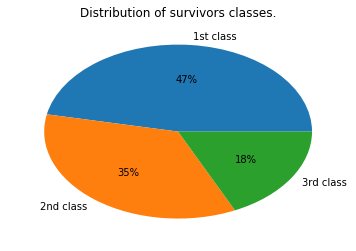

In [8]:
#the plot show the survivors distribution
plt.pie(data_set.groupby(['Pclass']).mean()['Survived'],labels=['1st class','2nd class','3rd class'],autopct='%.0f%%')
plt.title('Distribution of survivors classes.')

In [9]:
# the ratio of survivors in every class
data_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
data_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# Feature engineering
def quantized_age (age_coulme):
    age = []
    for i in range(len(age_coulme)):
        if age_coulme[i] < 10 :
            age.append(0)
        elif (age_coulme[i] > 10 and age_coulme[i] < 70):
            age.append(1)
        else:
            age.append(2)
    return(age)
def titile_cat (name):
    Title = name.str.extract(' ([A-Za-z]+)\.', expand=False)
    Title = Title.replace('Mlle', 'Miss')
    Title = Title.replace('Master', 'Master')
    Title = Title.replace(['Mme', 'Dona', 'Ms'], 'Mrs')
    Title = Title.replace(['Jonkheer','Don'],'Mr')
    Title = Title.replace(['Capt','Major', 'Col','Rev','Dr'], 'Millitary')
    Title = Title.replace(['Lady', 'Countess','Sir'], 'Honor')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Millitary": 5, "Honor": 6}
    title = Title.map(title_mapping)
    return title 
def is_mr (title):
    is_mr = []
    for i in range (len(title)):
        if title[i]==1:
            is_mr.append(1)
        else:
            is_mr.append(0)
    return is_mr
def is_miss (title):
    is_miss = []
    for i in range (len(title)):
        if title[i]==2:
            is_miss.append(1)
        else:
            is_miss.append(0)
    return is_miss
def is_mrs (title):
    is_mrs = []
    for i in range (len(title)):
        if title[i]==3:
            is_mrs.append(1)
        else:
            is_mrs.append(0)
    return is_mrs
def is_master (title):
    is_master = []
    for i in range (len(title)):
        if title[i]==4:
            is_master.append(1)
        else:
            is_master.append(0)
    return is_master 
def is_millitary (title):
    is_millitary = []
    for i in range (len(title)):
        if title[i]==5:
            is_millitary.append(1)
        else:
            is_millitary.append(0)
    return is_millitary
def is_honor (title):
    is_honor = []
    for i in range (len(title)):
        if title[i]==6:
            is_honor.append(1)
        else:
            is_honor.append(0)
    return is_honor

def num_sex (sex_coulme):
    sex = []
    for i in range(len(sex_coulme)):
        if sex_coulme[i] == 'male':
            sex.append(0)
        else:
            sex.append(1)
    return(sex)
def quantized_fare (fare_coulme):
    fare = []
    for i in range(len(fare_coulme)):
        if fare_coulme[i] < fare_coulme.median():
            fare.append(0)
        else:
            fare.append(1)
    return(fare)

def one_hot_incoder(input_list,num_classes):
    for value in input_list:
        y = np.zeros(num_classes)

        y[value]=1
        yield y
def embarked_mapping (embarked_coulme):
        embarked_coulme = embarked_coulme.map( {'S': 0, 'C': 1, 'Q': 2} )
        return embarked_coulme
def is_rich_female (pclass,sex):
    rich_female=[]
    for i in range (len(sex)):
        if (sex[i]== 1 and pclass[i]==1):
            rich_female.append(1)
        else:
            rich_female.append(0)
    return rich_female
def class_2_female (sex,pclass):
    class_2_female=[]
    for i in range (len(sex)):
        if (sex[i]== 1 and pclass[i]==2):
            class_2_female.append(1)
        else:
            class_2_female.append(0)
    return class_2_female
def class_3_male (sex,pclass):
    class_3_male=[]
    for i in range (len(sex)):
        if (sex[i]== 0 and pclass[i]==3):
            class_3_male.append(1)
        else:
            class_3_male.append(0)
    return class_3_male
def is_alone (parch,sibsd):
    is_alone=[]
    for i in range (len(parch)):
        if (parch[i]+sibsd[i]==0):
            is_alone.append(1)
        else:
            is_alone.append(0)
    return is_alone

In [12]:
# Creating features for training
age=np.array(quantized_age(data_set.Age.fillna(data_set.Age.mean())))
sex = np.array(num_sex(data_set.Sex))
fare = np.array(quantized_fare(data_set.Age.fillna(data_set.Fare.median())))
sex_fare = np.bitwise_and(sex,fare)
pclass=np.array(data_set.Pclass)
Parch = np.array(data_set.Parch.fillna(0))
SibSp=np.array(data_set.SibSp.fillna(0))
Is_alone = np.array(is_alone(Parch,SibSp))
title = np.array(titile_cat(data_set.Name))
Is_mr = np.array(is_mr(title))
Is_miss = np.array(is_miss(title))
Is_mrs = np.array(is_mrs(title))
Is_master = np.array(is_master(title))
Is_millitary = np.array(is_millitary(title))
Is_honor = np.array(is_honor(title))
Embarked = np.array(embarked_mapping(data_set.Embarked.fillna('S')))
rich_female = np.array(is_rich_female(sex,pclass))
Class_2_female = np.array(class_2_female(sex,pclass))
Class_3_male = np.array(class_3_male(sex,pclass))
print ("training features created")

training features created


In [13]:
#Creating features for testing
age_t=np.array(quantized_age(test_set.Age.fillna(data_set.Age.mean())))
sex_t = np.array(num_sex(test_set.Sex))
fare_t = np.array(quantized_fare(test_set.Age.fillna(data_set.Fare.median())))
sex_fare_t = np.bitwise_and(sex_t,fare_t)
pclass_t=np.array(test_set.Pclass)
Parch_t = np.array(test_set.Parch.fillna(0))
SibSp_t=np.array(test_set.SibSp.fillna(0))
Is_alone_t = np.array(is_alone(Parch_t,SibSp_t))
title_t = np.array(titile_cat(test_set.Name))
Is_mr_t = np.array(is_mr(title_t))
Is_miss_t = np.array(is_miss(title_t))
Is_mrs_t = np.array(is_mrs(title_t))
Is_master_t = np.array(is_master(title_t))
Is_millitary_t = np.array(is_millitary(title_t))
Is_honor_t = np.array(is_honor(title_t))
Embarked_t = np.array(embarked_mapping(test_set.Embarked.fillna('S')))
rich_female_t = np.array(is_rich_female(sex_t,pclass_t))
Class_2_female_t = np.array(class_2_female(sex_t,pclass_t))
Class_3_male_t = np.array(class_3_male(sex_t,pclass_t))
print ("testing features created")

testing features created


Text(0.5,1,'Survived rich womens')

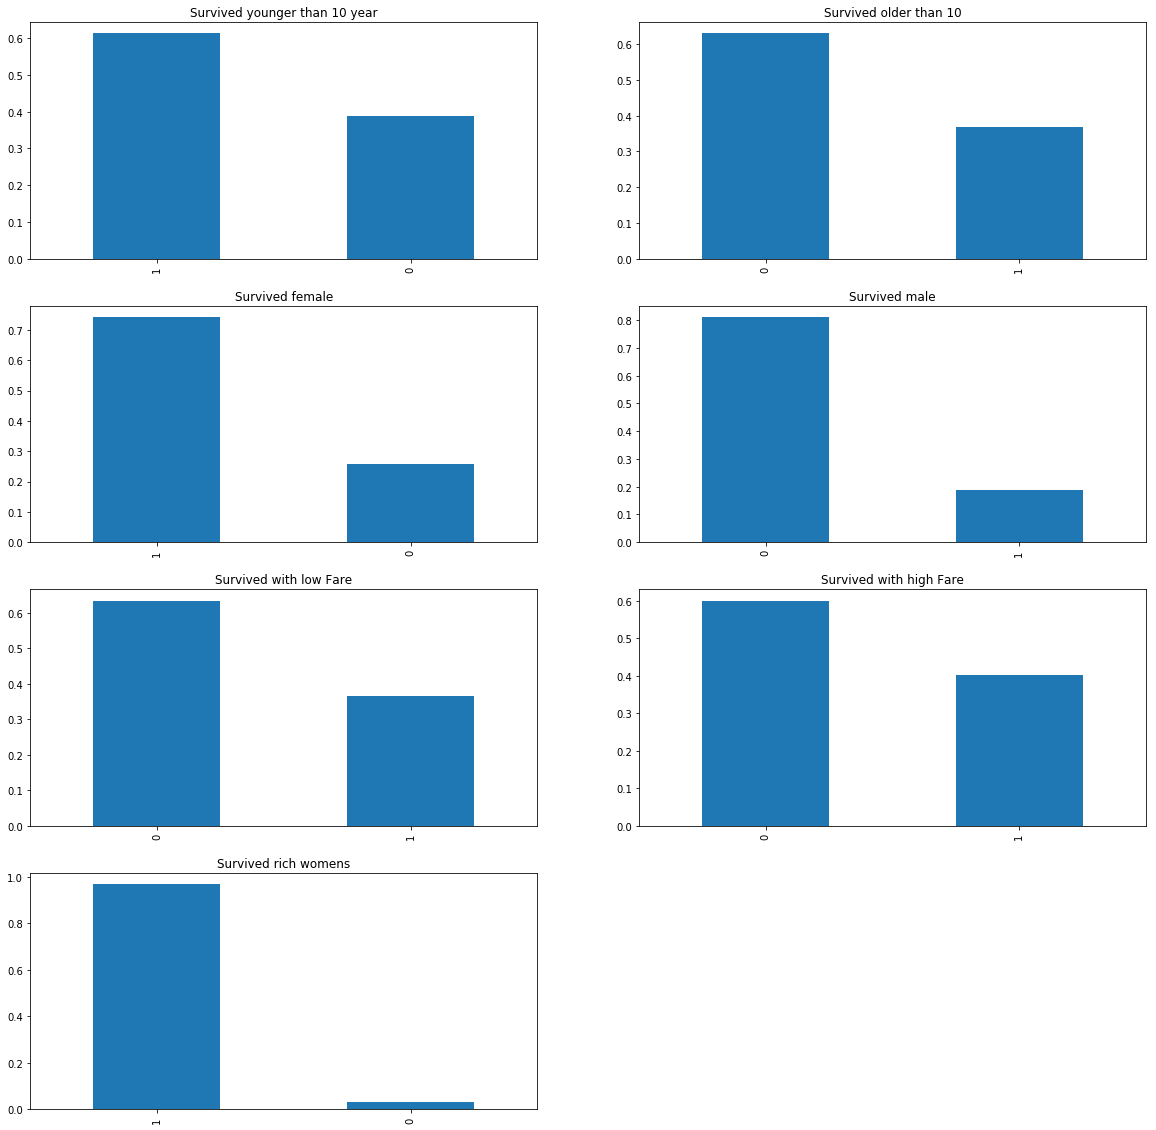

In [14]:
# Data Visualizing 
fig=plt.figure(figsize=(20,20))
plt.subplot2grid((4,2),(0,0))
data_set.Survived[age==0].value_counts(normalize=True).plot.bar()
plt.title("Survived younger than 10 year")
plt.subplot2grid((4,2),(0,1))
data_set.Survived[age==1].value_counts(normalize=True).plot.bar()
plt.title("Survived older than 10")
plt.subplot2grid((4,2),(1,0))
data_set.Survived[sex==1].value_counts(normalize=True).plot.bar()
plt.title("Survived female")
plt.subplot2grid((4,2),(1,1))
data_set.Survived[sex==0].value_counts(normalize=True).plot.bar()
plt.title("Survived male")
plt.subplot2grid((4,2),(2,0))
data_set.Survived[fare==0].value_counts(normalize=True).plot.bar()
plt.title("Survived with low Fare")
plt.subplot2grid((4,2),(2,1))
data_set.Survived[fare==1].value_counts(normalize=True).plot.bar()
plt.title("Survived with high Fare")
plt.subplot2grid((4,2),(3,0))
data_set.Survived[rich_female==1 ].value_counts(normalize=True).plot.bar()
plt.title("Survived rich womens")
# plt.show()

In [15]:
x_data = np.array([rich_female,age,sex,fare,sex_fare,pclass,Parch,SibSp,Is_alone,Is_mr,Is_miss,Is_mrs,Is_master,Is_millitary,
                  Is_honor,Class_2_female,Class_3_male]).transpose()
x_test = np.array([rich_female_t,age_t,sex_t,fare_t,sex_fare_t,pclass_t,Parch_t,SibSp_t,Is_alone_t,Is_mr_t,Is_miss_t,
                   Is_mrs_t,Is_master_t,Is_millitary_t,Is_honor_t,Class_2_female_t,Class_3_male_t]).transpose()
y_data = np.array(data_set.Survived)


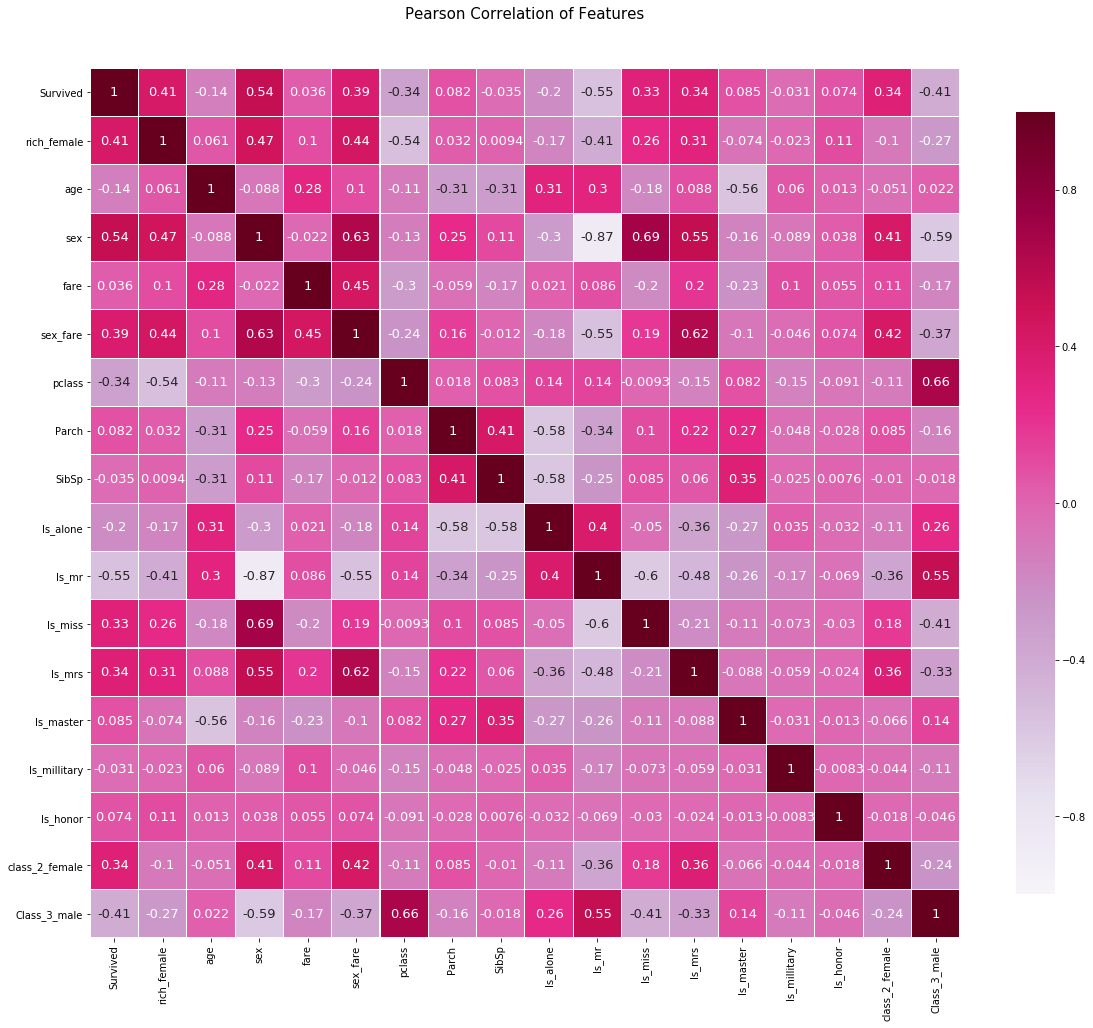

In [16]:
df=pd.DataFrame(x_data,columns=['rich_female','age','sex','fare','sex_fare','pclass','Parch','SibSp','Is_alone',
                                'Is_mr','Is_miss','Is_mrs','Is_master','Is_millitary', 'Is_honor','class_2_female','Class_3_male'])
df=pd.merge(data_set.Survived.to_frame(),df,left_index=True, right_index=True)
df.corr()
# x_test=x_data[(len(x_data)*8//10):len(x_data)]
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 16))
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'PuRd',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.05,vmax=1.0,vmin=-1.0, linecolor='white',
        annot_kws={'fontsize':13 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [17]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_data, y_data)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_data, y_data) * 100, 2)
# err = 1/len(y_test)*np.sum(np.power((y_pred-y_test),2))
acc_decision_tree

85.519999999999996

In [18]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_data, y_data)
y_pred_lr = logreg.predict(x_test)
acc_log = round(logreg.score(x_data, y_data) * 100, 2)
acc_log

84.060000000000002

In [19]:

# Random Forest# Random  

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_data, y_data)
y_pred_RF = random_forest.predict(x_test)
random_forest.score(x_data, y_data)
acc_random_forest = round(random_forest.score(x_data, y_data) * 100, 2)
submission_RF = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_pred_RF
    })
submission_RF.to_csv('E:\MachineLearning_Competitons\Titanic\RF_predections.csv', index=False)
acc_random_forest

85.519999999999996

In [20]:
# Support Vector Machines

svc = SVC()
svc.fit(x_data, y_data)
y_pred_svc = svc.predict(x_test)
acc_svc = round(svc.score(x_data, y_data) * 100, 2)
submission_SVC = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_pred_svc
    })
submission_SVC.to_csv('E:\MachineLearning_Competitons\Titanic\SCV_predections.csv', index=False)
print(acc_svc)

83.16


In [21]:
# Keras neural nets
from keras.utils.np_utils import to_categorical
y_data_k = to_categorical(y_data)
y_train =y_data_k[0:len(y_data_k)*8//10]
y_test_k=y_data_k[(len(y_data_k)*8//10):len(y_data_k)]
x_train =x_data[0:len(x_data)*8//10]
x_test_k=x_data[(len(x_data)*8//10):len(x_data)]
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=17))
model.add(Dense(units=16, activation='relu', input_dim=16))
model.add(Dense(units=16, activation='relu', input_dim=16))
model.add(Dense(units=2, activation='hard_sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_data, y_data_k, epochs=300, batch_size=32)
loss_and_metrics = model.evaluate(x_test_k, y_test_k, batch_size=32)


Epoch 1/300
891/891 [==============================] - 9s 10ms/step - loss: 0.6640 - acc: 0.5982
Epoch 2/300
891/891 [==============================] - 0s 297us/step - loss: 0.6138 - acc: 0.6392
Epoch 3/300
891/891 [==============================] - 0s 244us/step - loss: 0.5564 - acc: 0.6835
Epoch 4/300
891/891 [==============================] - 0s 233us/step - loss: 0.5072 - acc: 0.7666
Epoch 5/300
891/891 [==============================] - 0s 228us/step - loss: 0.4674 - acc: 0.8103
Epoch 6/300
891/891 [==============================] - 0s 228us/step - loss: 0.4413 - acc: 0.8204
Epoch 7/300
891/891 [==============================] - 0s 231us/step - loss: 0.4352 - acc: 0.8249
Epoch 8/300
891/891 [==============================] - 0s 237us/step - loss: 0.4407 - acc: 0.8260
Epoch 9/300
891/891 [==============================] - 0s 239us/step - loss: 0.4274 - acc: 0.8328
Epoch 10/300
891/891 [==============================] - 0s 224us/step - loss: 0.4233 - acc: 0.8339
Epoch 11/300
891/891

891/891 [==============================] - 0s 237us/step - loss: 0.3734 - acc: 0.8446
Epoch 84/300
891/891 [==============================] - 0s 224us/step - loss: 0.3737 - acc: 0.8451
Epoch 85/300
891/891 [==============================] - 0s 237us/step - loss: 0.3722 - acc: 0.8468
Epoch 86/300
891/891 [==============================] - 0s 236us/step - loss: 0.3791 - acc: 0.8474
Epoch 87/300
891/891 [==============================] - 0s 224us/step - loss: 0.3720 - acc: 0.8457
Epoch 88/300
891/891 [==============================] - 0s 235us/step - loss: 0.3726 - acc: 0.8434
Epoch 89/300
891/891 [==============================] - 0s 248us/step - loss: 0.3727 - acc: 0.8446
Epoch 90/300
891/891 [==============================] - 0s 222us/step - loss: 0.3710 - acc: 0.8457
Epoch 91/300
891/891 [==============================] - 0s 221us/step - loss: 0.3709 - acc: 0.8468
Epoch 92/300
891/891 [==============================] - 0s 251us/step - loss: 0.3713 - acc: 0.8440
Epoch 93/300
891/891 [=

891/891 [==============================] - 0s 287us/step - loss: 0.3619 - acc: 0.8479
Epoch 165/300
891/891 [==============================] - 0s 249us/step - loss: 0.3599 - acc: 0.8485
Epoch 166/300
891/891 [==============================] - 0s 247us/step - loss: 0.3598 - acc: 0.8418
Epoch 167/300
891/891 [==============================] - 0s 287us/step - loss: 0.3585 - acc: 0.8446
Epoch 168/300
891/891 [==============================] - 0s 256us/step - loss: 0.3610 - acc: 0.8457
Epoch 169/300
891/891 [==============================] - 0s 292us/step - loss: 0.3620 - acc: 0.8429
Epoch 170/300
891/891 [==============================] - 0s 290us/step - loss: 0.3591 - acc: 0.8389
Epoch 171/300
891/891 [==============================] - 0s 266us/step - loss: 0.3598 - acc: 0.8434
Epoch 172/300
891/891 [==============================] - 0s 299us/step - loss: 0.3564 - acc: 0.8418
Epoch 173/300
891/891 [==============================] - 0s 247us/step - loss: 0.4722 - acc: 0.8204
Epoch 174/300


891/891 [==============================] - 0s 255us/step - loss: 0.3488 - acc: 0.8468
Epoch 247/300
891/891 [==============================] - 0s 240us/step - loss: 0.3493 - acc: 0.8485
Epoch 248/300
891/891 [==============================] - 0s 236us/step - loss: 0.3511 - acc: 0.8479
Epoch 249/300
891/891 [==============================] - 0s 248us/step - loss: 0.3519 - acc: 0.8446
Epoch 250/300
891/891 [==============================] - 0s 261us/step - loss: 0.3495 - acc: 0.8485
Epoch 251/300
891/891 [==============================] - 0s 238us/step - loss: 0.3492 - acc: 0.8468
Epoch 252/300
891/891 [==============================] - 0s 250us/step - loss: 0.3510 - acc: 0.8479
Epoch 253/300
891/891 [==============================] - 0s 267us/step - loss: 0.3490 - acc: 0.8474
Epoch 254/300
891/891 [==============================] - 0s 241us/step - loss: 0.3489 - acc: 0.8474
Epoch 255/300
891/891 [==============================] - 0s 260us/step - loss: 0.3501 - acc: 0.8468
Epoch 256/300


In [22]:
classes = model.predict(x_test, batch_size=32)
def hot_encoder_converter(x):
    y=[]
    for i in range(len(x)):
            if x[i,0]> 0.5:
                y.append(0)
            else:
                y.append(1)
    return y
y_keras = hot_encoder_converter(classes)
                
submission_keras = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_keras
    })
submission_keras.to_csv('E:\MachineLearning_Competitons\Titanic\keras_predections.csv', index=False)          


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
gbk = GradientBoostingClassifier()

# Gradient Boosting Classifier
# gbk =cClassifier()
gbk.fit(x_data, y_data)
y_pred_gb = gbk.predict(x_test)
acc_gbk = round(gbk.score(x_data, y_data) * 100, 2)
submission_GB = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_pred_gb
    })
submission_GB.to_csv('E:\MachineLearning_Competitons\Titanic\GradientBoosting_predections.csv', index=False)
acc_gbk

84.620000000000005

In [24]:
# ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_data, y_data)
y_pred_et = et.predict(x_test)
acc_et =round(et.score(x_data, y_data) * 100, 2)
submission_et = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_pred_et
    })
submission_et.to_csv('E:\MachineLearning_Competitons\Titanic\ExtraTreesClassifier_predections.csv', index=False)
print(acc_et)

85.52


In [25]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_data, y_data)
y_pred_l_svc = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_data, y_data) * 100, 2)
submission_l_svc = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": y_pred_et
    })
submission_l_svc.to_csv('E:\MachineLearning_Competitons\Titanic\LinearSVC_predections.csv', index=False)
print(acc_linear_svc)

84.06


In [26]:
df=pd.DataFrame({'logistic_reg_pred':y_pred_lr,'random_forest_pred':y_pred_RF,'keras_pred':y_keras,'svc_pred':y_pred_svc,
                 'GradientBoosting_pred':y_pred_gb,'ExtraTreesClassifier':y_pred_et,'LinearSVC':y_pred_l_svc})
models_predections_rates = pd.DataFrame({'model':['Logistic Regression','RandomForestClassifier','Keras Neural Nets','SVC',
                                                  'GradientBoostingClassifier','ExtraTreesClassifier','LinearSVC'],
                   'Survived predected rate':[df['logistic_reg_pred'].value_counts()[1]/len(x_test),df['random_forest_pred'].value_counts()[1]/len(x_test),
                                              df['keras_pred'].value_counts()[1]/len(x_test),df['svc_pred'].value_counts()[1]/len(x_test),
                                              df['GradientBoosting_pred'].value_counts()[1]/len(x_test),df['ExtraTreesClassifier'].value_counts()[1]/len(x_test),
                                              df['LinearSVC'].value_counts()[1]/len(x_test)],
                                         'Accuracy':[acc_log,acc_random_forest,84.9,acc_svc,acc_gbk,acc_et,acc_linear_svc]})
models_predections_rates.sort_values(by='Accuracy',ascending=False)

,Accuracy,Survived predected rate,model
1,85.52,0.366029,RandomForestClassifier
5,85.52,0.344498,ExtraTreesClassifier
2,84.90,0.354067,Keras Neural Nets
4,84.62,0.356459,GradientBoostingClassifier
0,84.06,0.358852,Logistic Regression
6,84.06,0.344498,LinearSVC
3,83.16,0.389952,SVC


C:\Users\Mai Daly\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


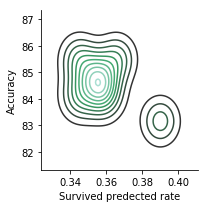

In [27]:
facet=sns.FacetGrid(models_predections_rates, palette = 'seismic')
facet = facet.map(sns.kdeplot, "Survived predected rate","Accuracy")